# 인공 신경망
- 이미지를 1차원 배열로 풀어내서 입력층을 만들어내고 계산을 출력층을 통해 계산해 냄

In [1]:
from tensorflow import keras

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_input.shape

(60000, 28, 28)

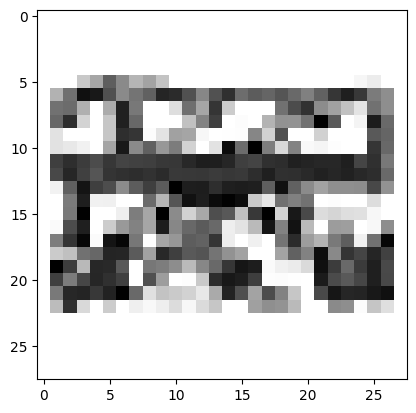

In [11]:
import matplotlib.pyplot as plt

plt.imshow(train_input[10000], cmap='gray_r')

In [14]:
# 이미지 데이터를 28x28 형태에서 784 길이의 1차원 배열로 변환
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [16]:
# 훈련 및 평가
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter = 5)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(scores)

{'fit_time': array([11.51418924, 11.38840914, 11.24489808, 11.43736482,  6.98357248]), 'score_time': array([0.06127381, 0.04413152, 0.08732629, 0.05112028, 0.04695106]), 'test_score': array([0.81008333, 0.77283333, 0.83683333, 0.80658333, 0.82558333])}


In [17]:
import tensorflow as tf

In [19]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [22]:
# 10개의 출력 뉴런을 가진 완전 연결층을 만듬. softmax 활성화 함수를 사용
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model = keras.Sequential([dense])

In [27]:
# 이진 크로스 엔트로피 손실 함수를 사용
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
# 모델 5번 반복 학습
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7307 - loss: 0.8243
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8306 - loss: 0.5004
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8413 - loss: 0.4582
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8510 - loss: 0.4424
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8513 - loss: 0.4377


In [29]:
# 모델 검증 및 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8498 - loss: 0.4506


[0.4498356580734253, 0.8495000004768372]